In [15]:
import numpy as np
import pyopencl as cl
import pyopencl.array as cl_array
from pyopencl import clrandom

# Initialize PyOpenCL
platform = cl.get_platforms()[0]
device = platform.get_devices()[0]
context = cl.Context([device])
queue = cl.CommandQueue(context)

# Define kernel function to generate random numbers using Philox
kernel_code = open("./program.cl").read()

# Compile kernel function
program = cl.Program(context, kernel_code).build()

# Set up output buffer
output_buffer = cl_array.zeros(queue, 1_000_000, dtype=np.uint64)

# Execute kernel
program.generate_random_numbers(queue, output_buffer.shape, None, output_buffer.data, np.uint32(123))

# Read output buffer
output = output_buffer.get()

# Print generated random numbers
print("Generated random numbers:")
print(output)

Generated random numbers:
[3079784246 1329993343 2374618785 ... 1679537896 3581596055 1520916915]


(array([ 9969., 10042.,  9971.,  9907., 10203.,  9955.,  9894., 10173.,
         9996.,  9951., 10087., 10043.,  9999., 10009.,  9928., 10007.,
         9931.,  9893.,  9932., 10136., 10035., 10151.,  9937., 10045.,
         9934., 10099., 10059., 10023., 10030., 10012., 10032., 10133.,
         9970., 10141.,  9911.,  9853.,  9813.,  9872.,  9928.,  9878.,
        10051.,  9879., 10049.,  9891., 10108.,  9907.,  9874., 10229.,
         9933.,  9916.,  9878., 10051., 10070., 10076.,  9990., 10002.,
         9854.,  9943.,  9850.,  9956., 10255.,  9995., 10077., 10041.,
        10033.,  9975., 10047., 10055.,  9797.,  9908.,  9783., 10114.,
         9996., 10107.,  9966., 10034.,  9957., 10206.,  9952.,  9943.,
        10242., 10036.,  9900., 10054., 10052.,  9897., 10066.,  9936.,
        10104.,  9972., 10024.,  9974., 10012., 10053., 10116.,  9881.,
         9984., 10151.,  9996.,  9920.]),
 array([0.00000000e+00, 4.29496730e+07, 8.58993459e+07, 1.28849019e+08,
        1.71798692e+08

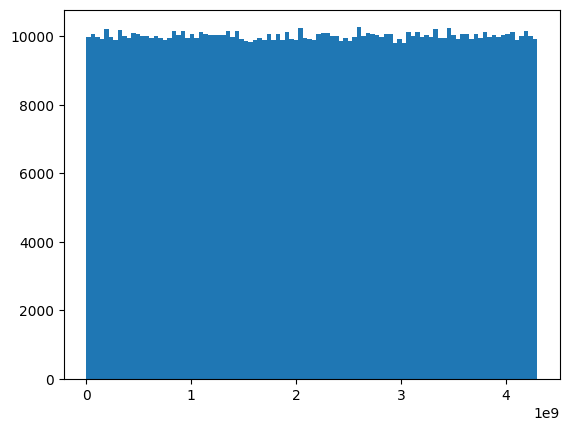

In [16]:
import matplotlib.pyplot as plt
plt.hist(output_buffer.get(), bins=100, range=(0, 2**32))